In [26]:
from data import *
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from cdlib import algorithms
import numpy as np
import colorsys

# G_fail_win, G_succ_win = create_graphs(3773593, "Barcelona")
# G_fail_lose, G_succ_lose = create_graphs(3773593, "Villarreal")

# G_fail_win, G_succ_win = create_player_zone_graph(3773593, "Barcelona")
# G_fail_lose, G_succ_lose = create_player_zone_graph(3773593, "Villarreal")

# G_fail_win, G_succ_win = create_player_zone_graph(3773585, "Real Madrid")
# G_fail_lose, G_succ_lose = create_player_zone_graph(3773585, "Barcelona")

G_fail_win, G_succ_win = create_player_zone_graph(3773593, "Barcelona")
G_fail_lose, G_succ_lose = create_player_zone_graph(3773585, "Barcelona")

Total passes: 735
735
Total passes: 626
626


In [27]:
def draw_weighted_graph(G, node_sizes=300):
    pos = {
        1: [0, 1],
        2: [2, 1],
        3: [4, 1],
        4: [6, 1],
        5: [1, 2],
        6: [5, 2],
        7: [1, 0],
        8: [5, 0]
    }
    edge_labels = nx.get_edge_attributes(G, "weight")
    max_edge = max(edge_labels.values())
    edge_widths = [e / max_edge * 10 for e in edge_labels.values()]

    plt.figure(figsize=(12,12))
    nx.draw_networkx_nodes(G, pos, alpha=0.5, node_size=node_sizes)
    nx.draw_networkx_edges(G, pos, width=edge_widths, connectionstyle='arc3,rad=0.1')
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # nx.draw_networkx_edge_labels(G, pos, edge_labels, label_pos=0.3)


def draw_weighted_graph_(G, node_sizes=300, communities=False, player_labels=False):
    
    zone_colors = {
        1: 'tab:red',
        2: 'tab:olive',
        3: 'tab:blue',
        4: 'tab:red',
        5: 'tab:orange',
        6: 'tab:purple',
        7: 'tab:orange',
        8: 'tab:purple'
    }

    pos = {}
    node_color = []
    labels = []
    player_labels = {}

    for node_ix, node in G.nodes(data=True):
        zone = node['zone']
        point1, point2 = zones[zone]
        x_min, y_min = point1
        x_max, y_max = point2
        x = random.randrange(x_min, x_max)
        y = random.randrange(y_min, y_max)
        
        pos[node_ix] = [x, y]
        color = zone_colors[zone]
        if node['player'] == -1:
            color = 'black'
        
        player_labels[node_ix] = node['player_name']

        if communities:
            color = node['community']
        node_color.append(color)
        labels.append(node['player'])


    edge_labels = nx.get_edge_attributes(G, "weight")
    max_edge = max(edge_labels.values())
    edge_widths = [e / max_edge * 10 for e in edge_labels.values()]




    plt.figure(figsize=(20,20))
    nx.draw_networkx_nodes(G, pos=pos, node_color=node_color, node_size=node_sizes)
    nx.draw_networkx_edges(G, pos=pos, width=edge_widths, alpha=0.5, connectionstyle='arc3,rad=0.1')
    if player_labels:
        nx.draw_networkx_labels(G, pos=pos, labels=player_labels, font_size=20, font_family="sans-serif")
    else:
        nx.draw_networkx_labels(G, pos=pos, font_size=20, font_family="sans-serif")
    # nx.draw_networkx_edge_labels(G, pos, edge_labels, label_pos=0.3)

## General statistics

In [28]:
def get_num_passes(G):
    num = 0
    for e in G.edges(data=True):
        num += e[2]['weight']

    return num

### Number of nodes

In [29]:
print("WINNING TEAM")
print(f"Successful nodes: {len(G_succ_win.nodes)}")
print(f"Failed nodes: {len(G_fail_win.nodes)}")
print(f"Total nodes: {len(G_succ_win.nodes) + len(G_fail_win.nodes)}")
print("\nLOSING TEAM")
print(f"Successful nodes: {len(G_succ_lose.nodes)}")
print(f"Failed nodes: {len(G_fail_lose.nodes)}")
print(f"Total nodes: {len(G_succ_lose.nodes) + len(G_fail_lose.nodes)}")


WINNING TEAM
Successful nodes: 82
Failed nodes: 51
Total nodes: 133

LOSING TEAM
Successful nodes: 68
Failed nodes: 46
Total nodes: 114


### Number of passes (edges)

In [30]:
print("WINNING TEAM")
print(f"Successful passes: {get_num_passes(G_succ_win)}")
print(f"Failed passes: {get_num_passes(G_fail_win)}")
print(f"Total passes: {get_num_passes(G_succ_win) + get_num_passes(G_fail_win)}")
print("\nLOSING TEAM")
print(f"Successful passes: {get_num_passes(G_succ_lose)}")
print(f"Failed passes: {get_num_passes(G_fail_lose)}")
print(f"Total passes: {get_num_passes(G_succ_lose) + get_num_passes(G_fail_lose)}")


WINNING TEAM
Successful passes: 651
Failed passes: 84
Total passes: 735

LOSING TEAM
Successful passes: 547
Failed passes: 79
Total passes: 626


### Average in/out-degree

In [31]:
def get_avg_indegree(G):

    indegree = defaultdict(lambda:0)
    for _, out, weight in G.edges(data=True):
        indegree[out] += weight['weight']

    return sum(indegree.values()) / len(G.nodes)

def get_avg_outdegree(G):

    outdegree = defaultdict(lambda:0)
    for in_, _, weight in G.edges(data=True):
        outdegree[in_] += weight['weight']

    return sum(outdegree.values()) / len(G.nodes)

In [32]:
print("WINNING TEAM")
print(f"Successful: {get_avg_indegree(G_succ_win)}")
print(f"Failed: {get_avg_indegree(G_fail_win)}")
print("\nLOSING TEAM")
print(f"Successful: {get_avg_indegree(G_succ_lose)}")
print(f"Failed: {get_avg_indegree(G_fail_lose)}")

WINNING TEAM
Successful: 7.939024390243903
Failed: 1.6470588235294117

LOSING TEAM
Successful: 8.044117647058824
Failed: 1.7173913043478262


### Clustering coefficient

In [46]:
print(max(nx.clustering(G_succ_win, weight='weight').values()))
print(max(nx.clustering(G_succ_lose, weight='weight').values()))

0.16775903765398986
0.1784424136243621


### Strongly connected component

In [34]:
print(len(max(nx.strongly_connected_components(G_succ_win), key=len)) / len(G_succ_win.nodes))
print(len(max(nx.strongly_connected_components(G_succ_lose), key=len)) / len(G_succ_lose.nodes))
print(len(max(nx.strongly_connected_components(G_fail_win), key=len)) / len(G_fail_win.nodes))
print(len(max(nx.strongly_connected_components(G_fail_lose), key=len)) / len(G_fail_lose.nodes))

0.9146341463414634
0.8970588235294118
0.0196078431372549
0.021739130434782608


### Density

In [35]:
def density_weighted(G):
    num_passes = get_num_passes(G)
    density = num_passes / (len(G.nodes) * (len(G.nodes)-1))
    
    return density

def in_degree_centrality_weighted(G):
    if len(G) <= 1:
        return {n: 1 for n in G}

    s = 1.0 / (len(G) - 1.0)
    centrality = {n: d * s for n, d in G.in_degree(weight='weight')}
    return centrality

def out_degree_centrality_weighted(G):
    if len(G) <= 1:
        return {n: 1 for n in G}

    s = 1.0 / (len(G) - 1.0)
    centrality = {n: d * s for n, d in G.out_degree(weight='weight')}
    return centrality

In [36]:
# Density
density_succ_win = density_weighted(G_succ_win)
density_succ_lose = density_weighted(G_succ_lose)
density_fail_win = density_weighted(G_fail_win)
density_fail_lose = density_weighted(G_fail_lose)
print(f'Winning game, successful passess: {density_succ_win}')
print(f'Losing game, successful passess: {density_succ_lose}')
print(f'Winning game, failed passess: {density_fail_win}')
print(f'Losing game, failed passess: {density_fail_lose}')

Winning game, successful passess: 0.0980126467931346
Losing game, successful passess: 0.12006145741878842
Winning game, failed passess: 0.03294117647058824
Losing game, failed passess: 0.03816425120772947


## Degree distribution

In [37]:
def get_degree_dist(G):
    degree_dist = defaultdict(lambda:0)

    for node_id, node in G.nodes(data=True):
        out = 0
        for edge in G.out_edges(node_id, data=True):
            out += edge[2]['weight']
        degree_dist[out] += 1

    return degree_dist

Text(0.5, 1.0, 'Unsuccessful passes for losing team')

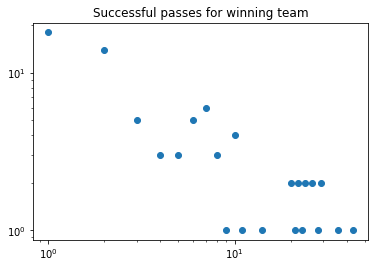

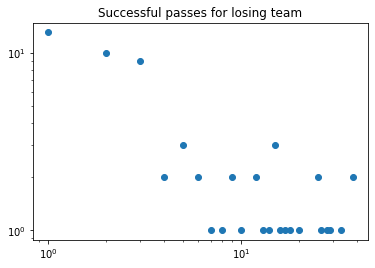

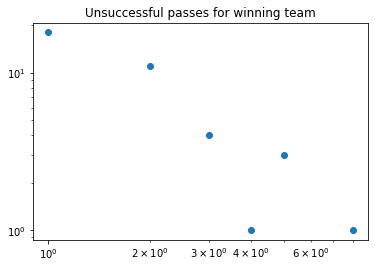

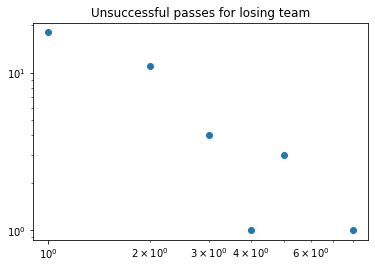

In [38]:
degree_dist = get_degree_dist(G_succ_win)
plt.figure()
plt.scatter(degree_dist.keys(), degree_dist.values())
plt.yscale('log')
plt.xscale('log')
plt.title("Successful passes for winning team")


degree_dist = get_degree_dist(G_succ_lose)
plt.figure()
plt.scatter(degree_dist.keys(), degree_dist.values())
plt.yscale('log')
plt.xscale('log')
plt.title("Successful passes for losing team")

degree_dist = get_degree_dist(G_fail_lose)
plt.figure()
plt.scatter(degree_dist.keys(), degree_dist.values())
plt.yscale('log')
plt.xscale('log')
plt.title("Unsuccessful passes for winning team")

degree_dist = get_degree_dist(G_fail_lose)
plt.figure()
plt.scatter(degree_dist.keys(), degree_dist.values())
plt.yscale('log')
plt.xscale('log')
plt.title("Unsuccessful passes for losing team")

In [39]:
def get_nodes_by_centrality(G, centrality_measure,num_nodes=10):
    
    nodes = {}
    if centrality_measure.__name__ == 'betweenness_centrality':
        centrality = centrality_measure(G, weight='weight')
    else:
        centrality = centrality_measure(G)
    sorted_nodes = dict(sorted(centrality.items(), reverse=True, key=lambda x: x[1]))
    for node in list(sorted_nodes.keys())[:num_nodes]:
        zone = G.nodes[node]['zone']
        player = G.nodes[node]['player']
        # print(sorted_nodes[node])
        nodes[node] = (zone, player), sorted_nodes[node]

    return nodes

### In-degree centrality

{0: (3, 5203), 66: (3, 5503), 13: (6, 5211), 30: (2, 6826), 67: (2, 5213), 24: (2, 5203), 45: (6, 3501), 22: (8, 21881), 42: (6, 8118), 2: (3, 3501)}
{30: (6, 5211), 42: (2, 5213), 22: (6, 30756), 25: (3, 5503), 41: (3, 5203), 60: (2, 8118), 34: (2, 6826), 48: (2, 5203), 43: (3, 3501), 54: (3, 8118)}


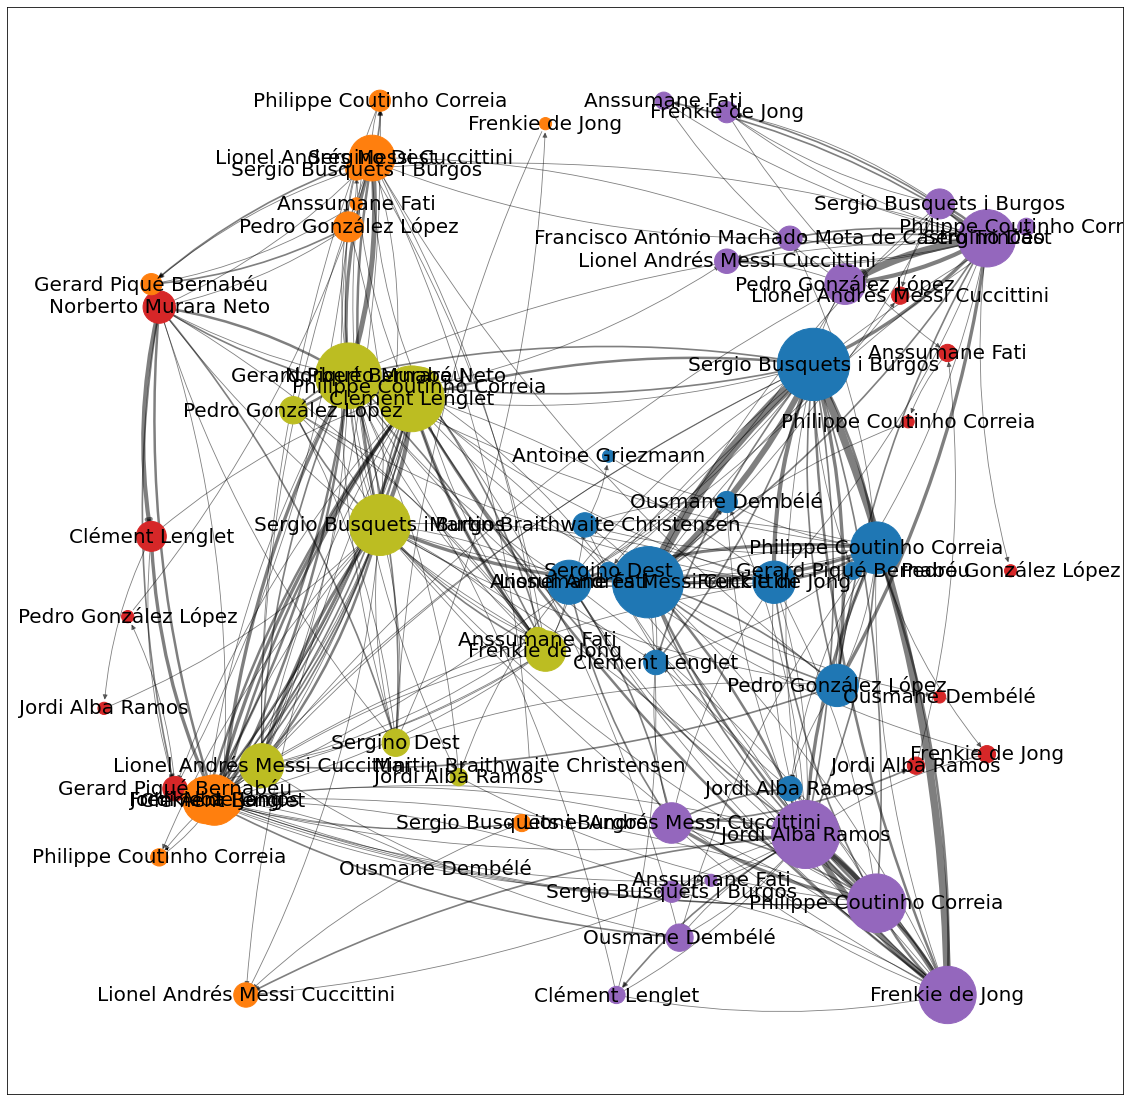

In [40]:
# In-degree centrality
# print(f'Winning game, successfull:\n{in_degree_centrality_weighted(G_succ_win)}')
# print(f'Losing game, successfull:\n{in_degree_centrality_weighted(G_succ_lose)}')
# print()
# print(f'Winning game, failed:\n{in_degree_centrality_weighted(G_fail_win)}')
# print(f'Losing game, failed:\n{in_degree_centrality_weighted(G_fail_lose)}')

in_degree_centrality = in_degree_centrality_weighted(G_succ_lose)
print(get_nodes_by_centrality(G_succ_lose, in_degree_centrality_weighted))
print(get_nodes_by_centrality(G_succ_win, in_degree_centrality_weighted))

print(sum([s for _, s in get_nodes_by_centrality(G_succ_lose, in_degree_centrality_weighted).values()]) / len(G_succ_lose.nodes))
print(sum([s for _, s in get_nodes_by_centrality(G_succ_win, in_degree_centrality_weighted).values()]) / len(G_succ_win.nodes))

draw_weighted_graph_(G_succ_lose, [a * 10000 for a in in_degree_centrality.values()])

### Out-degree centrality

{0: (3, 5203), 67: (2, 5213), 13: (6, 5211), 66: (3, 5503), 30: (2, 6826), 24: (2, 5203), 22: (8, 21881), 42: (6, 8118), 2: (3, 3501), 33: (7, 21881)}
{42: (2, 5213), 30: (6, 5211), 25: (3, 5503), 27: (1, 6590), 34: (2, 6826), 38: (5, 5211), 41: (3, 5203), 43: (3, 3501), 54: (3, 8118), 47: (7, 6379)}


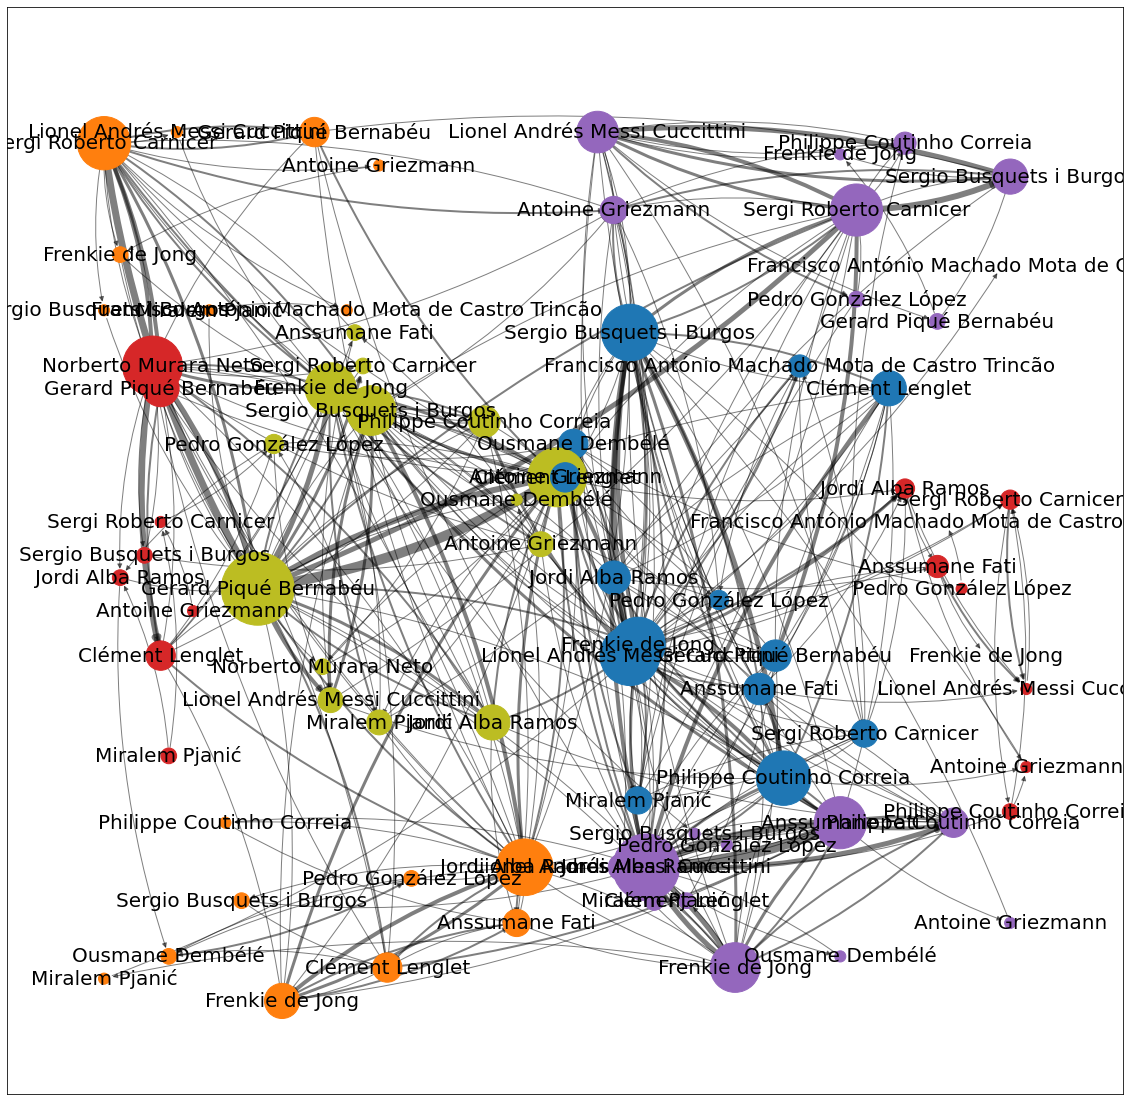

In [41]:
# Out-degree centrality
# print(f'Winning game, successfull:\n{out_degree_centrality_weighted(G_succ_win)}')
# print(f'Losing game, successfull:\n{out_degree_centrality_weighted(G_succ_lose)}')
# print()
# print(f'Winning game, failed:\n{out_degree_centrality_weighted(G_fail_win)}')
# print(f'Losing game, failed:\n{out_degree_centrality_weighted(G_fail_lose)}')

print(get_nodes_by_centrality(G_succ_lose, out_degree_centrality_weighted))
print(get_nodes_by_centrality(G_succ_win, out_degree_centrality_weighted))

print(sum([s for _, s in get_nodes_by_centrality(G_succ_lose, out_degree_centrality_weighted).values()]) / len(G_succ_lose.nodes))
print(sum([s for _, s in get_nodes_by_centrality(G_succ_win, out_degree_centrality_weighted).values()]) / len(G_succ_win.nodes))

draw_weighted_graph_(G_succ_win, [a * 10000 for a in out_degree_centrality_weighted(G_succ_win).values()])

{24: (2, 5203), 49: (3, 8118), 66: (3, 5503), 2: (3, 3501), 67: (2, 5213), 13: (6, 5211), 22: (8, 21881), 30: (2, 6826), 23: (2, 5503), 33: (7, 21881)}
{38: (5, 5211), 41: (3, 5203), 48: (2, 5203), 42: (2, 5213), 25: (3, 5503), 30: (6, 5211), 47: (7, 6379), 34: (2, 6826), 54: (3, 8118), 27: (1, 6590)}


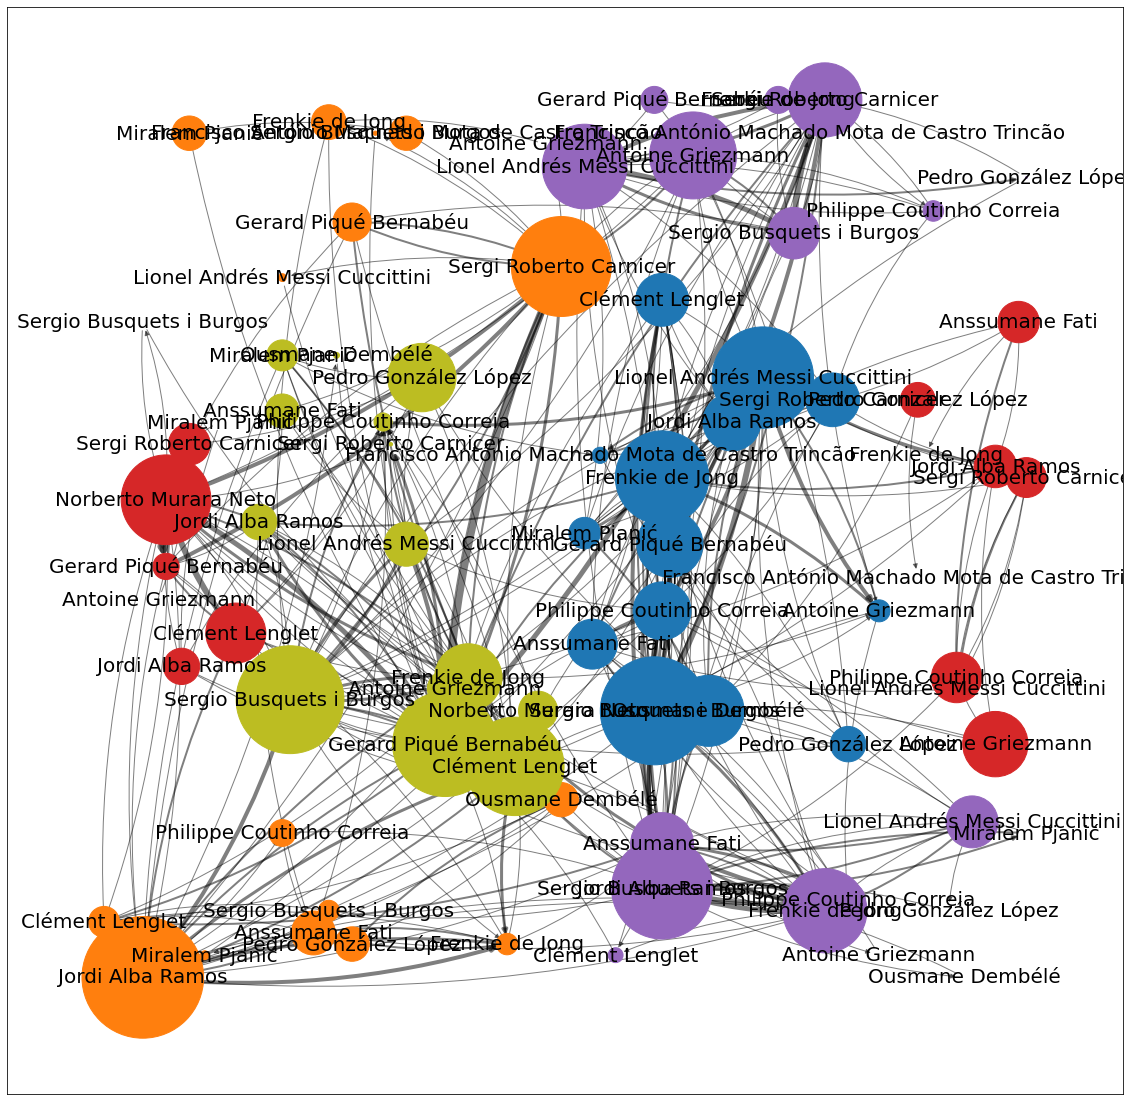

In [42]:
print(get_nodes_by_centrality(G_succ_lose, centrality_measure=nx.centrality.betweenness_centrality))
print(get_nodes_by_centrality(G_succ_win, centrality_measure=nx.centrality.betweenness_centrality))
draw_weighted_graph_(G_succ_win, [a * 100000 for a in nx.centrality.betweenness_centrality(G_succ_win, weight='weight').values()])

In [43]:
def get_community(G):
    communities = algorithms.infomap(G)
    community_dict = {}
    colors = get_colors(len(communities.communities))
    for c, arr in enumerate(communities.communities):
        for n in arr:
            community_dict[n] = colors[c]


    nx.set_node_attributes(G, community_dict, 'community')

    return communities.communities

In [44]:
#https://stackoverflow.com/questions/470690/how-to-automatically-generate-n-distinct-colors
def get_colors(num_colors):
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (50 + np.random.rand() * 10)/100.
        saturation = (90 + np.random.rand() * 10)/100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

8


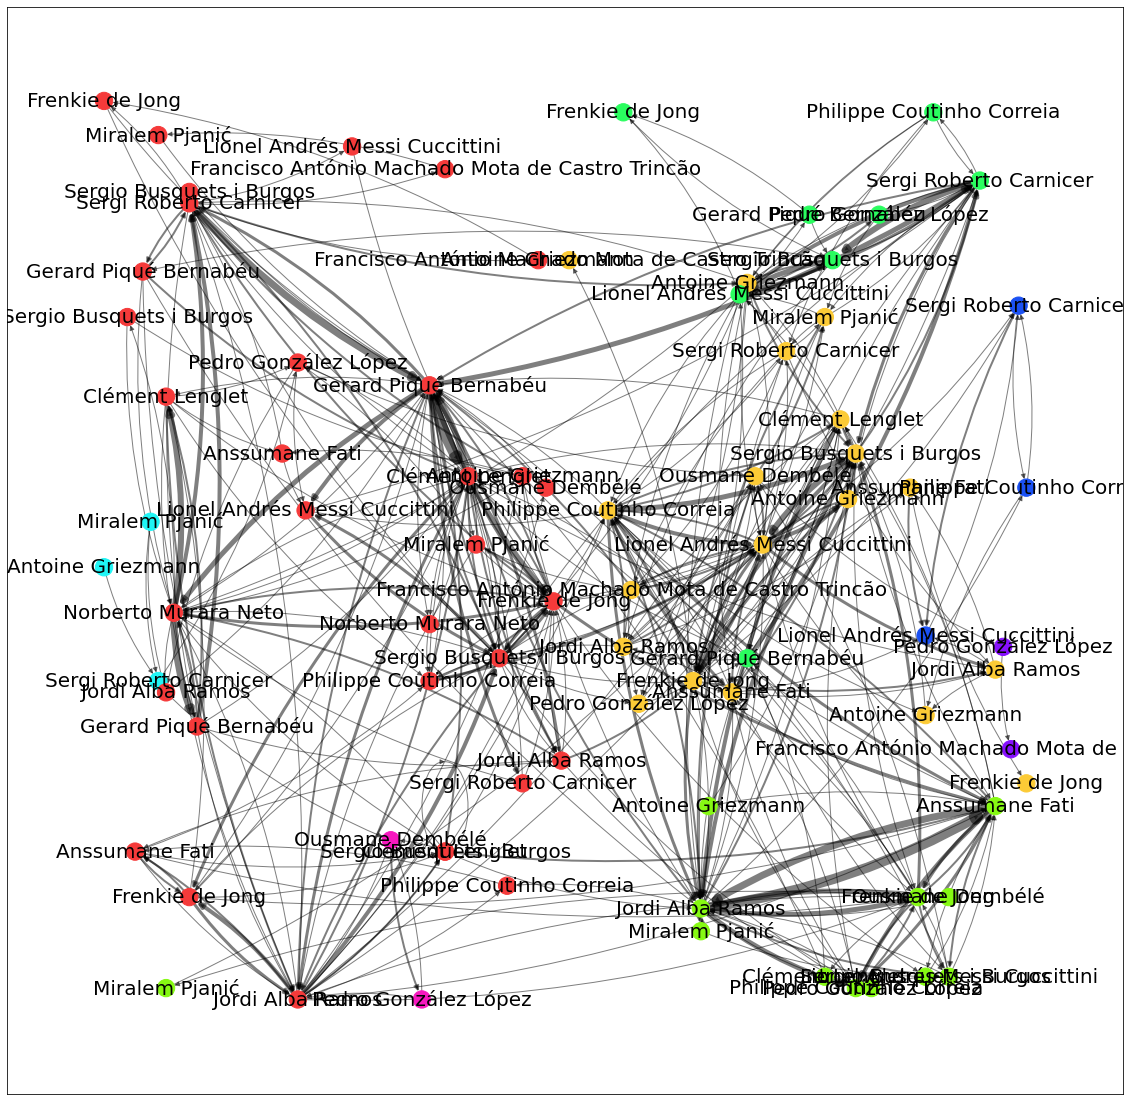

In [45]:
communities = get_community(G_succ_win)


print(len(communities))
draw_weighted_graph_(G_succ_win, communities=True, player_labels=True)

